In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from tensorflow.keras.layers import Dense, Input, GaussianNoise
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow import keras 
from tensorflow.keras import regularizers

In [153]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

le_sex = LabelEncoder()
le_emb = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_emb.fit_transform(df['Embarked'])

X = df.values
X.shape
X.dtype


C:\Users\Parth\AppData\Local\Temp\ipykernel_17424\762399291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\Parth\AppData\Local\Temp\ipykernel_17424\762399291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

dtype('float64')

In [155]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(f"Normalized Data Shape: {X_norm.shape}")

Normalized Data Shape: (891, 7)


In [156]:
int_sparse = Input(shape = (X_norm.shape[1],))
encoded_sparse = Dense(3,activation='relu',activity_regularizer=regularizers.l1(10e-5))(int_sparse)
decoded_sparse = Dense(X_norm.shape[1], activation='sigmoid')(encoded_sparse)

ae_sparse = Model(int_sparse,decoded_sparse)
encoder_sparse = Model(int_sparse,encoded_sparse)

ae_sparse.compile(optimizer='adam',loss='mse')

ae_sparse.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 7)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [157]:
int_denoise = Input(shape = (X_norm.shape[1],))
noisy = GaussianNoise(0.2)(int_denoise)
encoded_denoise = Dense(3,activation='relu')(noisy)
decoded_denoise = Dense(X_norm.shape[1], activation='sigmoid')(encoded_denoise)

ae_denoise = Model(int_denoise,decoded_denoise)
encoder_denoise = Model(int_denoise,encoded_denoise)

ae_denoise.compile(optimizer='adam',loss='mse')

ae_denoise.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_3 (GaussianNoise)     │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
history_sparse = ae_sparse.fit(X_norm,X_norm,epochs=50,batch_size=34,shuffle='True',verbose=0)

In [159]:
history_denoise = ae_denoise.fit(X_norm,X_norm,epochs=50,batch_size=34,shuffle='True',verbose=0)

In [160]:
encoded_sparse_data = encoder_sparse.predict(X_norm,verbose=0)
print(encoded_sparse_data)

[[1.8963193  1.2343885  1.2695446 ]
 [0.         0.16915008 0.        ]
 [1.0705004  0.12253964 2.0705357 ]
 ...
 [0.8599402  0.04085326 2.020284  ]
 [0.96996987 1.4187094  0.        ]
 [1.6025296  1.8816506  0.78975505]]


In [161]:
encoded_dense_data = encoder_denoise.predict(X_norm,verbose=0)
print(encoded_sparse_data)

[[1.8963193  1.2343885  1.2695446 ]
 [0.         0.16915008 0.        ]
 [1.0705004  0.12253964 2.0705357 ]
 ...
 [0.8599402  0.04085326 2.020284  ]
 [0.96996987 1.4187094  0.        ]
 [1.6025296  1.8816506  0.78975505]]


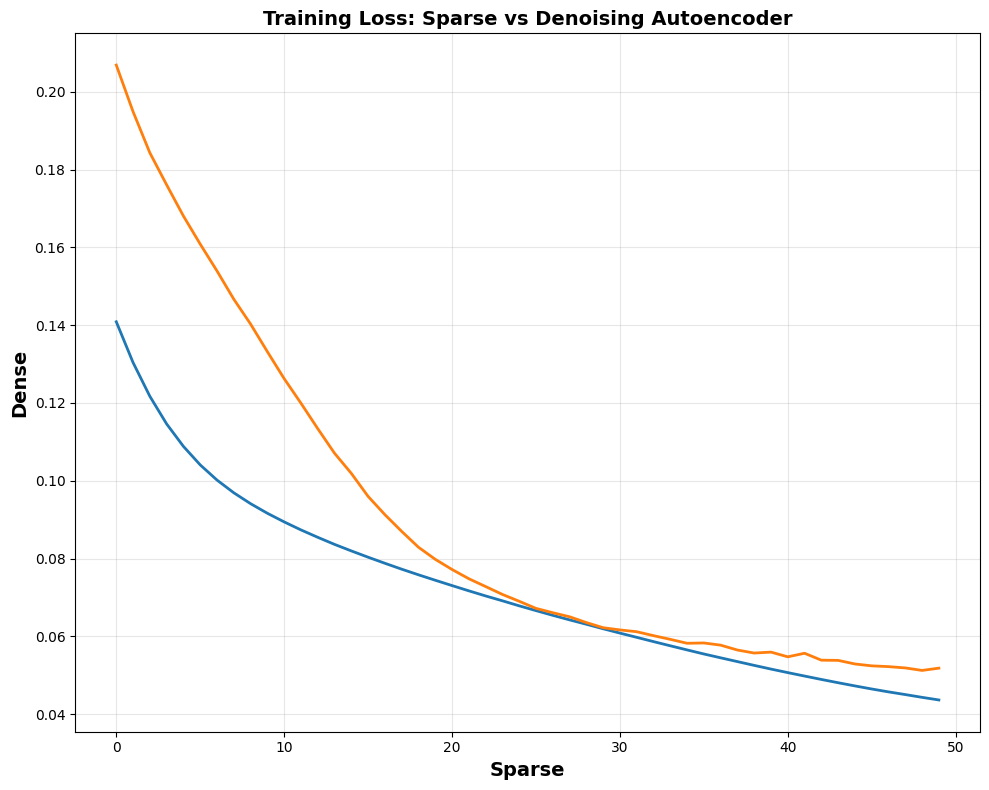

In [162]:
plt.figure(figsize=(10,8))
plt.plot(history_sparse.history['loss'],label='Sparse (L1 Regularization)',linewidth=2)
plt.plot(history_denoise.history['loss'],label='Denoising (Gaussian Noise)',linewidth=2)
plt.title('Training Loss: Sparse vs Denoising Autoencoder',fontsize=14,fontweight='bold')
plt.xlabel('Sparse',fontsize=14,fontweight='bold')
plt.ylabel('Dense',fontsize=14,fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [163]:

decoded_sparse_data = ae_sparse.predict(X_norm, verbose=0)
mse_sparse = np.mean((X_norm - decoded_sparse_data) ** 2)
print(f"Sparse Autoencoder MSE: {mse_sparse:.6f}")

Sparse Autoencoder MSE: 0.032863


In [164]:
decoded_denoise_data = ae_denoise.predict(X_norm, verbose=0)
mse_denoise = np.mean((X_norm - decoded_denoise_data) ** 2)
print(f"Denoising Autoencoder MSE: {mse_denoise:.6f}")
     


Denoising Autoencoder MSE: 0.046295
